In [3]:
# Import necessary packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sys
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import feature_scoring, prim, dimensional_stacking, pairs_plotting
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import ema_workbench.em_framework.samplers
from SALib.analyze import sobol
from SALib.sample import saltelli, morris, fast_sampler
import SALib.util.results
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf
from ema_workbench.util import ema_logging
from funs_project import get_opti_policies, get_selected_policies
import time
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)
from sklearn import preprocessing

# Spread plotting

To see how much the policies of an actor can affect another actor, we will take a look at the spread of the outcomes of interest in response to a specific policy across scenarios (as obtained from the synthesis).

In [1]:
# Gorssel = "simulation/synthesis/synthesis_Gorssel_10000_17-06-2021-08-58-03.tar.gz"
# Overijssel = "simulation/synthesis/synthesis_Overijssel_10000_17-06-2021-10-24-48.tar.gz"

# paths = {'Gorssel':Gorssel, 'Overijssel':Overijssel}

# actors = ['Gorssel', 'Overijssel']

# for actor in actors:

#     experiments, outcomes = load_results(paths[actor])

#     outcomes = pd.DataFrame(outcomes)

#     columns = list(outcomes.columns)

#     columns.append('policy')

#     y_df = pd.concat([experiments, outcomes], axis=1)[columns]


#     for policy in list(y_df['policy'].unique()):

#         fig, ax = plt.subplots(figsize=(10,5))

#         y = y_df[y_df['policy']==policy]

#         new_y = pd.DataFrame(y).drop(columns=['policy'])
#         y_array = new_y.values

#         min_max_scaler = preprocessing.MinMaxScaler()
#         y_scaled = min_max_scaler.fit_transform(y_array)

#         data = pd.DataFrame(y_scaled)

#         ax.boxplot(data)
#         ax.set_title('Outcome spread for '+ actor + ', ' + str(policy), fontsize=12)
#         xticks = [key + ' (std: ' + str(np.std(new_y)[key]) + ')' for key in list(new_y.columns)]
#         ax.set_xticklabels(xticks, rotation=90)

#         plt.savefig('../../report/figures/results/spreads/outcome_spread_' + actor + '_' + policy.replace(" ", "_") + '.png')

In [ ]:
Gorssel = "simulation/synthesis/synthesis_Gorssel_10000_17-06-2021-08-58-03.tar.gz"
Overijssel = "simulation/synthesis/synthesis_Overijssel_10000_17-06-2021-10-24-48.tar.gz"

paths = {'Gorssel':Gorssel, 'Overijssel':Overijssel}

actors = ['Gorssel', 'Overijssel']

for actor in actors:
    experiments, outcomes = load_results(paths[actor])
    
    outcomes = pd.DataFrame(outcomes)
    
    columns = list(outcomes.columns)
    
    columns.append('policy')
    
    y_df = pd.concat([experiments, outcomes], axis=1)[columns]
    
    aggregated = y_df.groupby(by=list(outcomes.columns))
    
    for outcome in list(outcomes.columns):
        
    
    for policy in list(y_df['policy'].unique()):


[MainProcess/INFO] results loaded succesfully from C:\Users\David2\Documents\GitHub\FabiosDecisions\epa1361\final assignment\simulation\synthesis\synthesis_Gorssel_10000_17-06-2021-08-58-03.tar.gz


TypeError: bar() missing 1 required positional argument: 'height'

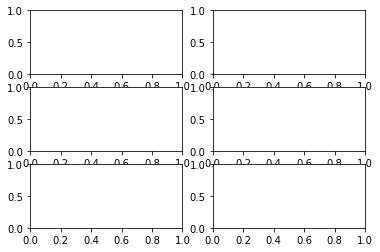

In [28]:
Gorssel = "simulation/synthesis/synthesis_Gorssel_10000_17-06-2021-08-58-03.tar.gz"
Overijssel = "simulation/synthesis/synthesis_Overijssel_10000_17-06-2021-10-24-48.tar.gz"

paths = {'Gorssel':Gorssel, 'Overijssel':Overijssel}

actor = 'Gorssel'

experiments, outcomes = load_results(paths[actor])
    
outcomes = pd.DataFrame(outcomes)
    
columns = list(outcomes.columns)
    
columns.append('policy')
    
y_df = pd.concat([experiments, outcomes], axis=1)[columns]
    
aggregated = y_df.groupby('policy').std()

fig, ax = plt.subplots(3,2)

for i, outcome in enumerate(list(outcomes.columns)):
    data = aggregated[list(outcomes.columns)[0]].to_dict()
    ax.flatten()[i].bar(data)

#axes = aggregated.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2)  

#aggregated.T.plot(kind='bar')



#x = y_df.policy.unique()


#ax.bar(aggregated)

In [27]:
aggregated[list(outcomes.columns)[0]].to_dict()

{'Policy Deventer 0': 695.8928134663875,
 'Policy Deventer 1': 696.5957687158118,
 'Policy Deventer 2': 696.5957687158118,
 'Policy Deventer 3': 681.8352388122862,
 'Policy Deventer 4': 681.8352388122862,
 'Policy Overijssel 0': 718.7019021754273,
 'Policy Overijssel 1': 719.377612042382,
 'Policy Overijssel 2': 511.801132880711,
 'Policy Overijssel 3': 503.61677457983586,
 'Policy Overijssel 4': 529.8236118702065}

In [17]:
aggregated

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
policy,,,,,
Policy Deventer 0,695.892813,8.926841e-08,1.608281e+06,0.000101,96.222944
Policy Deventer 1,696.595769,2.144676e-07,3.811939e+05,0.000054,11.530525
Policy Deventer 2,696.595769,8.936149e-08,3.811939e+05,0.000022,19.142474
Policy Deventer 3,681.835239,6.767713e-08,2.507190e+07,0.001196,2032.002020
Policy Deventer 4,681.835239,8.459641e-08,2.507190e+07,0.001494,1635.607687
Policy Overijssel 0,718.701902,7.976906e-08,1.377449e+07,0.000781,1035.584983
Policy Overijssel 1,719.377612,8.053190e-08,2.030038e+06,0.000121,140.938755
Policy Overijssel 2,511.801133,6.873649e-08,1.965435e+07,0.001374,1205.057708
Policy Overijssel 3,503.616775,3.031324e-08,4.869335e+07,0.002526,3820.902472
